In [1]:
import torch
from models.channel_flow import Chanflow, calc_retau, get_hyperparams, get_yspace, get_mixing_len_model, make_plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import grad

In [64]:
dns_retau1000 = pd.read_csv('../machine-learning-turbulence/data/LM_Channel_Retau1000.txt', delimiter=' ')
dns_retau550 = pd.read_csv('../machine-learning-turbulence/data/LM_Channel_Retau550.txt', delimiter=' ')
dns_retau180 = pd.read_csv('../machine-learning-turbulence/data/LM_Channel_Retau180.txt', delimiter=' ')

In [9]:
def massage_dns(delta, hypers, dns):
    tau_w = -delta * hypers['dp_dx']
    u_tau = np.sqrt(tau_w / hypers['rho'])
    h_v = hypers['nu'] / u_tau
    half_y = dns[['y+,']]*h_v
    half_u = dns[['u_1,']]
    full_u = np.concatenate([half_u, half_u], axis=0)
    full_y = np.concatenate([half_y, -half_y+2*delta], axis=0)
    return full_u, full_y, half_u,  half_y

In [23]:
def plot_dns(handle, half_u, half_y):
    handle.plot(half_u, half_y-1, color='red', label='DNS')
    handle.plot(half_u, -half_y+2*delta-1, color='red')
    handle.legend()

In [83]:
hypers = get_hyperparams(ymin=-1, ymax=1, num_epochs=20000, lr=0.0005, num_layers=4, num_units=40)

## $Re_\tau = 180$

In [84]:
hypers['nu']=0.005555555555
delta = (hypers['ymax']-hypers['ymin'])/2
reynolds_stress = get_mixing_len_model(hypers['k'], delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
retau=calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

Training at Retau=180.000000018


In [85]:
dns_u180, dns_y180, half_u180,  half_y180 = massage_dns(delta, hypers, dns_retau180)

In [86]:
pdenn180 = Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses180 = pdenn180.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 20000/20000 [09:13<00:00, 36.15it/s, loss=0.09]


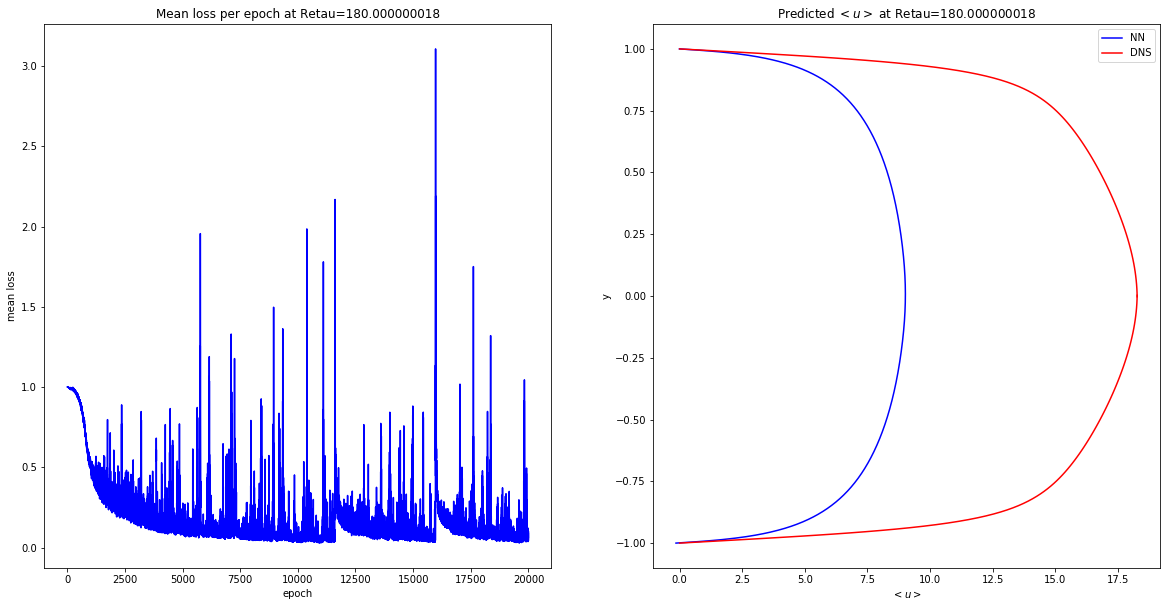

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
make_plots(ax, losses180, pdenn180, hypers, retau)
plot_dns(ax[1], half_u180, half_y180)

## $Re_\tau = 550$

In [88]:
hypers['nu']=0.001818181818
delta = (hypers['ymax']-hypers['ymin'])/2
reynolds_stress = get_mixing_len_model(hypers['k'], delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
retau=calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

Training at Retau=550.000000055


In [89]:
dns_u550, dns_y550, half_u550, half_y550 = massage_dns(delta, hypers, dns_retau550)

In [90]:
pdenn550 = Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses550 = pdenn550.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 20000/20000 [09:15<00:00, 36.01it/s, loss=0.48]


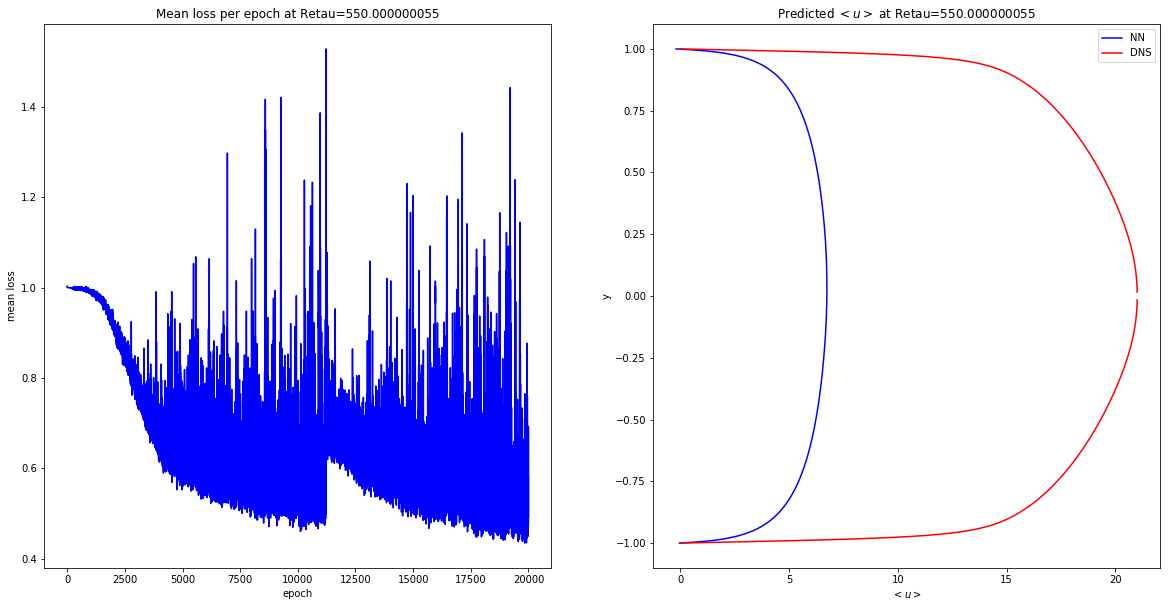

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
make_plots(ax, losses550, pdenn550, hypers, retau)
plot_dns(ax[1], half_u550, half_y550)

## $Re_\tau = 1000$

In [92]:
hypers['nu']=0.001
delta = (hypers['ymax']-hypers['ymin'])/2
reynolds_stress = get_mixing_len_model(hypers['k'], delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
retau=calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

Training at Retau=1000.0


In [93]:
dns_u1000, dns_y1000, half_u1000, half_y1000 = massage_dns(delta, hypers, dns_retau1000)

In [94]:
pdenn1000 = Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses1000 = pdenn1000.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 20000/20000 [09:09<00:00, 36.40it/s, loss=0.85]


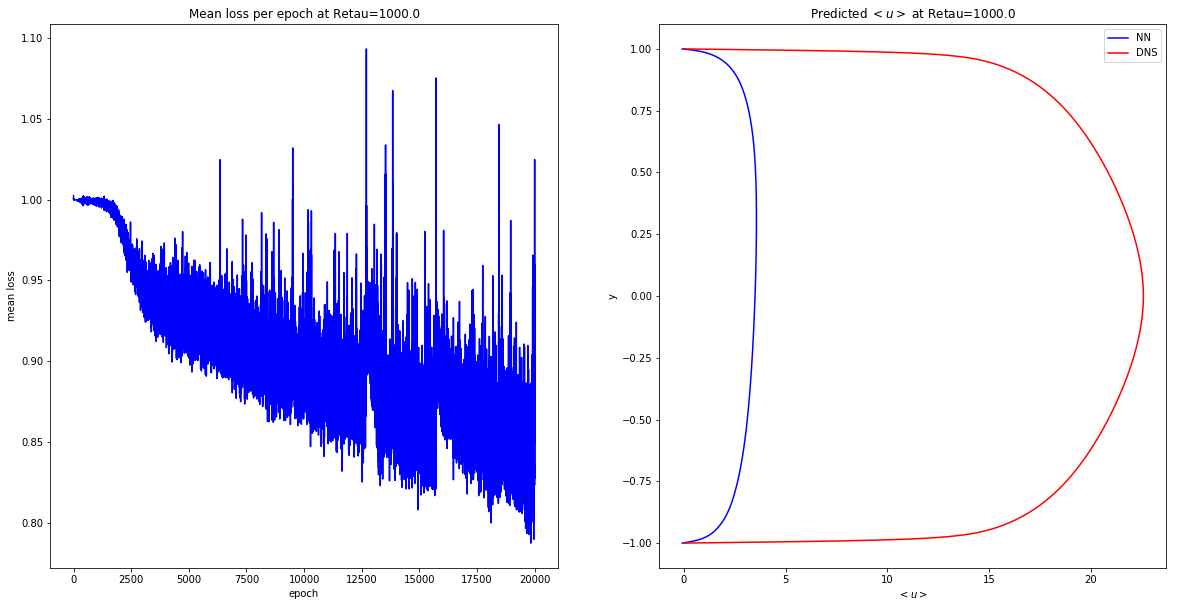

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
make_plots(ax, losses1000, pdenn1000, hypers, retau)
plot_dns(ax[1], half_u1000, half_y1000)